In [1]:
#Description: This program gets BTC's daily simple return

In [13]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime
plt.style.use('fivethirtyeight')

In [14]:
stock_start_date ='2018-01-01'
today=datetime.today().strftime('%Y-%m-%d')

In [15]:
def get_my_stock(ticker,start=stock_start_date,end=today):
    data= web.DataReader(ticker,data_source='yahoo',start=start,end=end)
    return data

In [18]:
my_stock=get_my_stock('BTC-USD')
my_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,14377.400391,12755.599609,12897.700195,14156.400391,12136299520,14156.400391
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
...,...,...,...,...,...,...
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,17194183075,38138.179688
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,14643548444,37917.601562
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,20734730465,38483.125000


In [19]:
# df = df.set_index(pd,DatetimeIndex(df['Date'].values))make date column date index

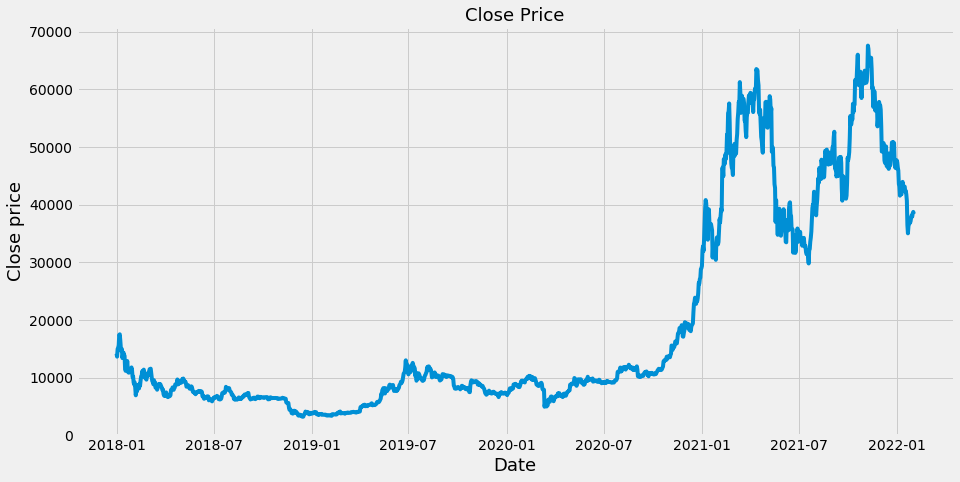

In [21]:
#Visually show and plot the close price
plt.figure(figsize=(14,7))
plt.title('Close Price', fontsize =18)
plt.plot(my_stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.show()

In [23]:
#Calculate and Show the Daily simple Return (DSR)
DSR =my_stock['Close'].pct_change()
# Show the Daily simple return
DSR

Date
2017-12-31         NaN
2018-01-01   -0.035263
2018-01-02    0.097011
2018-01-03    0.014611
2018-01-04    0.026196
                ...   
2022-01-29    0.009365
2022-01-30   -0.005784
2022-01-31    0.014915
2022-02-01    0.006760
2022-02-02   -0.008962
Name: Close, Length: 1495, dtype: float64

In [24]:
#Get some statistics on the Daily Simple Return
DSR.describe()

count    1494.000000
mean        0.001458
std         0.039385
min        -0.371695
25%        -0.015564
50%         0.001388
75%         0.018035
max         0.187465
Name: Close, dtype: float64

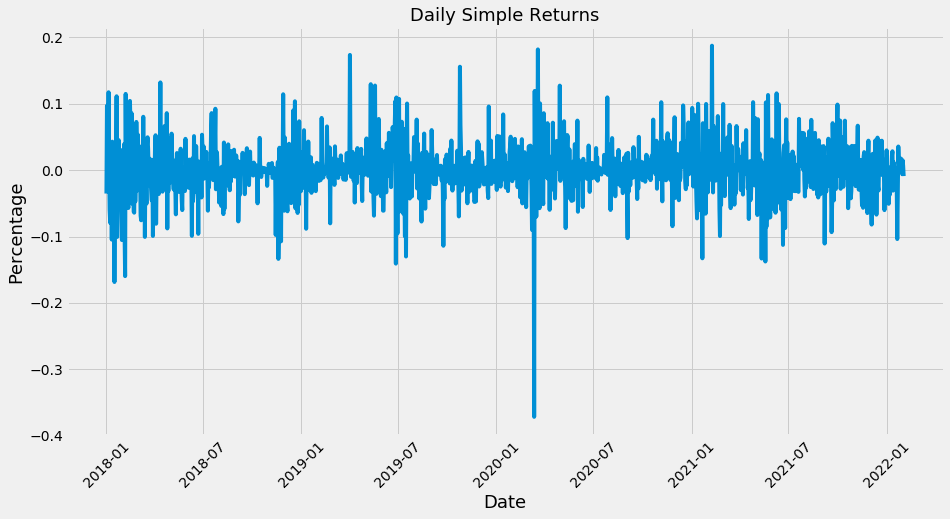

In [29]:
#Visuallt show and plot the daily simple returns
plt.figure(figsize=(14,7))
plt.title('Daily Simple Returns',fontsize=18)
plt.plot(DSR)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Percentage',fontsize=18)
plt.xticks(rotation = 45)
plt.show()

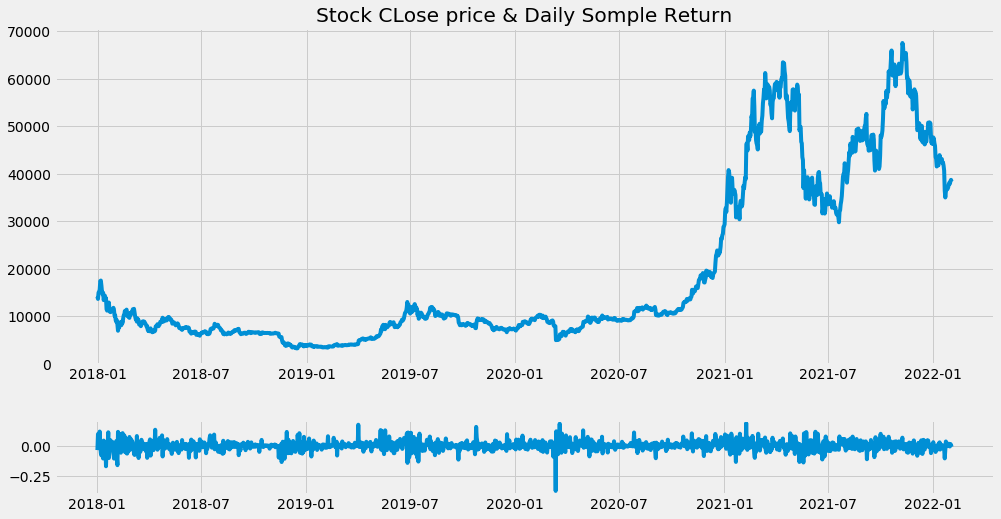

In [116]:
axs1=plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
plt.title('Stock CLose price & Daily Somple Return')
axs1.plot(np.array(my_stock['Close'].index),my_stock['Close'])
axs2=plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
axs2.plot(np.array(DSR.index),DSR)
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

In [142]:
type(my_stock)

pandas.core.frame.DataFrame

In [137]:
my_stock['DSR']=DSR
my_stock

,High,Low,Open,Close,Volume,Adj Close,DSR
Date,,,,,,,
2017-12-31,14377.400391,12755.599609,12897.700195,14156.400391,12136299520,14156.400391,NaN
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195,-0.035263
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609,0.097011
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000,0.014611
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195,0.026196
...,...,...,...,...,...,...,...
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,17194183075,38138.179688,0.009365
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,14643548444,37917.601562,-0.005784
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,20734730465,38483.125000,0.014915


In [143]:
x=my_stock.DSR[-30:]

In [165]:
u=x[x<=0]
u

Date
2022-01-04   -0.012066
2022-01-05   -0.050734
2022-01-06   -0.009366
2022-01-07   -0.037141
2022-01-10   -0.002155
2022-01-13   -0.030889
2022-01-16   -0.001471
2022-01-17   -0.020024
2022-01-19   -0.014898
2022-01-20   -0.025486
2022-01-21   -0.103812
2022-01-22   -0.039143
2022-01-26   -0.002757
2022-01-30   -0.005784
2022-02-02   -0.008962
Name: DSR, dtype: float64

In [164]:
d=x[x>=0]
d

Date
2022-01-08    0.004236
2022-01-09    0.004257
2022-01-11    0.021869
2022-01-12    0.028389
2022-01-14    0.011930
2022-01-15    0.001803
2022-01-18    0.002960
2022-01-23    0.035585
2022-01-24    0.010407
2022-01-25    0.008176
2022-01-27    0.007764
2022-01-28    0.017397
2022-01-29    0.009365
2022-01-31    0.014915
2022-02-01    0.006760
Name: DSR, dtype: float64

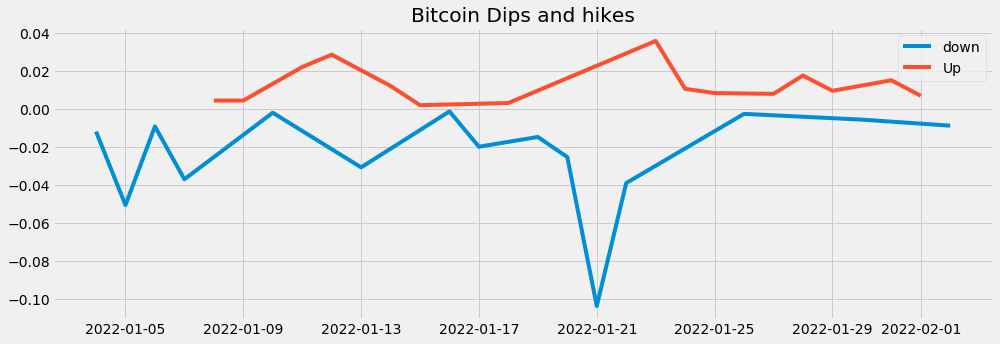

In [179]:
plt.figure(figsize=(15,5))
plt.plot(np.array(u.index),u,label='down')
plt.plot(np.array(d.index),d,label='Up')
plt.title('Bitcoin Dips and hikes')
plt.legend()
plt.show()

In [184]:
u.mean(),d.mean()#Overall market is 2 times morelikely go down 

(-0.024312573049810604, 0.01238753627188222)